I heard someone say the other day that due to the assymetric nature of human industrial activity, certain days of the week have a higher probability of rain than others. To check this, I want to examine weather data from a local station to see if this is true and if the effect has increased as time has gone on.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("C:\csv\whitestownweather.csv")
print(data.head())
print(data.shape)

       STATION               NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
0  USC00129557  WHITESTOWN, IN US   39.9962   -86.3543      286.8  1901-01-01   
1  USC00129557  WHITESTOWN, IN US   39.9962   -86.3543      286.8  1901-01-02   
2  USC00129557  WHITESTOWN, IN US   39.9962   -86.3543      286.8  1901-01-03   
3  USC00129557  WHITESTOWN, IN US   39.9962   -86.3543      286.8  1901-01-04   
4  USC00129557  WHITESTOWN, IN US   39.9962   -86.3543      286.8  1901-01-05   

   DAPR  MDPR  PRCP  SNOW  ...  TOBS  WT01  WT03  WT04  WT05  WT06  WT08  \
0   NaN   NaN   0.0   0.0  ...  10.0   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   0.0   0.0  ...  18.0   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   0.0   0.0  ...  24.0   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   0.0   0.0  ...  35.0   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   0.0   0.0  ...  27.0   NaN   NaN   NaN   NaN   NaN   NaN   

   WT09  WT11  WT14  
0   NaN   NaN   NaN  
1   NaN   Na

We only need a couple columns, namely the data and the total precip for that day. In addition, we'd only like to keep rows where the precipitation is non-zero.

In [12]:
precip = data[['DATE', 'PRCP']]
precip = precip[precip['PRCP'] > 0]
precip.shape[0]

13452

It looks like on average, it rains on about 13452/43111 =  of days. Let's figure out what day of the week each row falls on. Then we can count the number of rainy days per day of week.

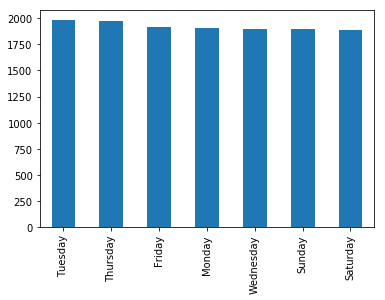

In [30]:
precip['TIME'] = pd.to_datetime(precip['DATE'])
precip['DoW'] = precip['TIME'].dt.weekday_name
precip['DoW'].value_counts()

%matplotlib inline

precip['DoW'].value_counts().plot.bar()
plt.show()

There doesn't appear to be any significant difference in precipitation between weekdays and weekends. In fact, Sunday and Saturday are the least rainy days overall (though not by much). There are two ways I could check this further. I could examine the total rainfall on each day to see if there is an imbalance, and I could check more weather stations to see if a pattern emerges. Let's do the former first.

             PRCP
DoW              
Friday     692.92
Monday     663.07
Saturday   670.34
Sunday     638.61
Thursday   689.65
Tuesday    718.34
Wednesday  665.04


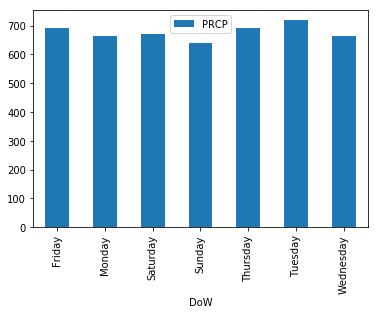

In [36]:
print(precip.groupby(['DoW']).sum())
precip.groupby(['DoW']).sum().plot.bar()
plt.show()

Again, a definite result isn't clear. We can search for a clear pattern by checking other weather stations at different locations for the same time period. If a day (or days) emerges that is more likely to be above or below the average, we can consider that a significant result. If the day of week is not correlated at all with rainfall, each day should on average have a 1/7 chance of being the rainest.